# Dataset
House prediction dataset:

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

The dataset contaians house sale prices for King county, which includes Seattle.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

In [143]:
df.head() # Display the first 5 rows of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [144]:
df.describe() # only show numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Linear Regression
A method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The repsonse/dependent variable (Y)

The result of a linear regression us a function that predict the response variable as a function of the predictor

$
\widehat{Y} = a + bX
$
- `a` refers to the `intercept` of the line
- `b` refers to the `slope`

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
# Create a Linear Regression object
lm = LinearRegression()
lm

LinearRegression()

### House does the `sqft_living` helps us predict the house `price`?

In [147]:
X = df[['sqft_living']] # This needs to be a 2D array
Y = df['price'] # This can be 1D

In [148]:
# Fit linear model
lm.fit(X, Y)

LinearRegression()

In [149]:
# Get the output prediction using X
Yhat = lm.predict(X)
Yhat[:5] # Display the first 5 predictions

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [150]:
# Get the value of the intercept (a)
lm.intercept_

-43580.74309447396

In [151]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

 Final estimate linear model

 $
 \widehat{Y} = a + bX
 $
 
 In our case: $price = -43580.74 + 280.62$

In [152]:
Yhat = -43580.74 + 280.62*X
print(f'Using X price = {Yhat}')
# or using price
price = -43580.74 + 280.62*df['sqft_living']
print(f'Using price = {price}')

Using X price =        sqft_living
0        287550.86
1        677612.66
2        172496.66
3        506434.46
4        427860.86
...            ...
21608    385767.86
21609    604651.46
21610    242651.66
21611    405411.26
21612    242651.66

[21613 rows x 1 columns]
Using price = 0        287550.86
1        677612.66
2        172496.66
3        506434.46
4        427860.86
           ...    
21608    385767.86
21609    604651.46
21610    242651.66
21611    405411.26
21612    242651.66
Name: sqft_living, Length: 21613, dtype: float64


## Task 1
Repeat proccess (Linear Model prediction) but using `bedrooms` as the independent variable and price as your dependent variable 

In [153]:
# Set variables 
X = df[['bedrooms']] 
Y = df['price']
# Create a Linear Regression object
lm2 = LinearRegression()
# Fit Variables
lm2.fit(X, Y)

LinearRegression()

In [154]:
# Get the output prediction using X
Yhat = lm2.predict(X)
Yhat[:5] # Display the first 5 predictions

array([494950.73585377, 494950.73585377, 373234.60934194, 616666.86236561,
       494950.73585377])

In [155]:
# Get the value of the intercept (a)
lm2.intercept_

129802.35631826002

In [156]:
# Get the value of the slope (b)
lm2.coef_

array([121716.12651184])

In [157]:
# Equation
Yhat = 129802.35 + 121716.12*X
Yhat


,bedrooms
0,494950.71
1,494950.71
2,373234.59
3,616666.83
4,494950.71
...,...
21608,494950.71
21609,616666.83
21610,373234.59
21611,494950.71


### Multiple Linear 
If you want to use more variables in our model to predict the price, then, use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3} + ... + b_{n}X_{n}
$


For this example good predictors of price will be:
- sqft_living
- bedrooms
- bathrooms
- sqft_lot

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv('../data/kc_house_data.csv')


In [159]:
# Get all the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] # This needs to be a 2D array
Y = df['price'] # This can be 1D

In [160]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [161]:
# Get the intercept a
a = lm.intercept_

In [162]:
# Get the slopes b1, b2, b3, b4
bs = lm.coef_

In [167]:
Yhat = a + (bs)[0]*df['sqft_living'] + (bs)[1]*df['bedrooms'] + (bs)[2]*df['bathrooms'] + (bs)[3]*df['sqft_lot']
Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561755
4        438367.862006
             ...      
21608    396982.741866
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

### Model Evaluation Using Visualization
### Regression Plot
Regression plots are a great tool to plot Linear Regression. this plot shows a combination of a scatter plot and a linear regression line

(0.0, 8084037.201492793)

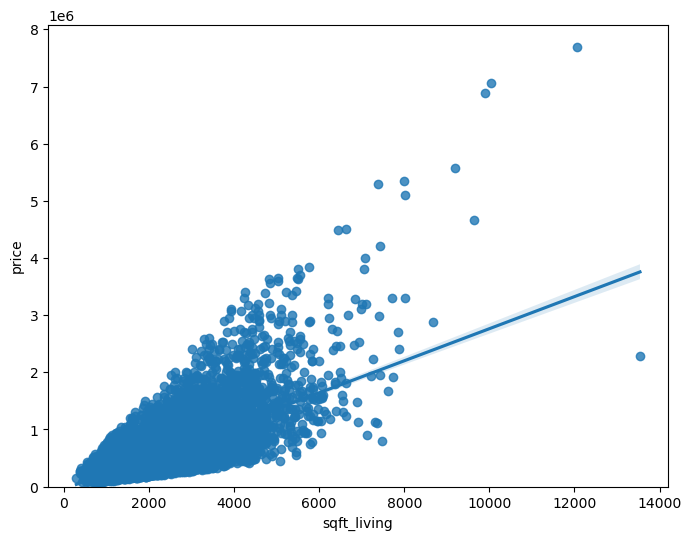

In [171]:
width = 8
height = 6
# Plot the figure
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_living', y='price', data=df)
plt.ylim(0,)

(0.0, 8081250.0)

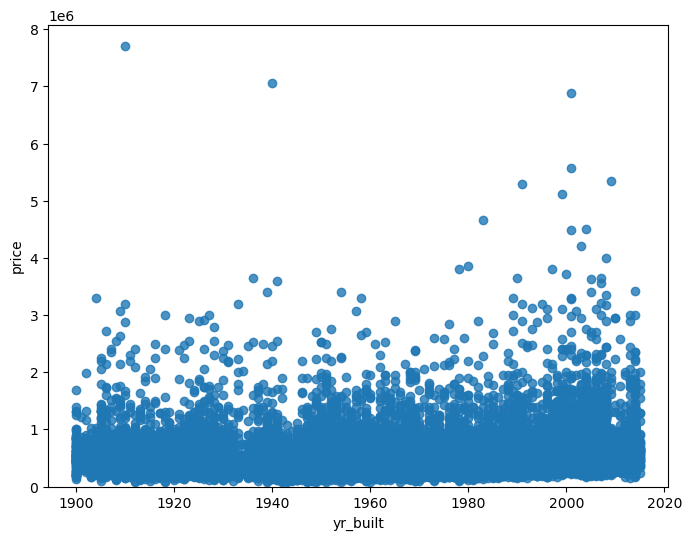

In [172]:
# Compar now versus the price
plt.figure(figsize=(width, height))
sns.regplot(x='yr_built', y='price', data=df)
plt.ylim(0,)

### Residual Plot
This is a good way to visualize the `variance` of the data.
- `Residual` is the difference betqeen the `observed value (y)` and the `predicted valyue (Yhat)`

<Axes: xlabel='sqft_living', ylabel='price'>

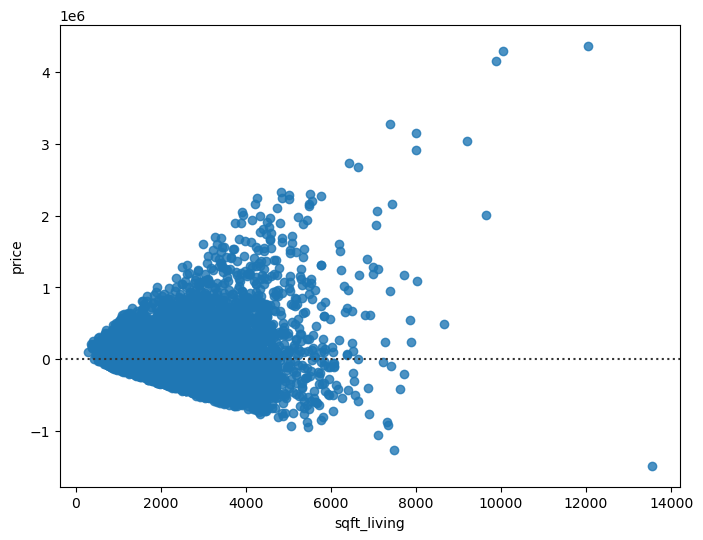

In [174]:
plt.figure(figsize=(width, height))
sns.residplot(x = df['sqft_living'],y = df['price'])

### Multiple Linear Regressionk Model Visualization

In [ ]:
# make our prediction
lm = LinearRegression()
# Get all the predictor variables
# This needs to be a 2D array
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]
Y = df['price']  # This can be 1D
lm.fit(X, Y)
Yhat = lm.predict(X)

array([275871.03699782, 719971.13143228, 204775.45517914, ...,
       285047.91507245, 418508.45302631, 285151.39187905])

C:\Users\18019\AppData\Local\Temp\ipykernel_12104\3915408196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
C:\Users\18019\AppData\Local\Temp\ipykernel_12104\3915408196.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

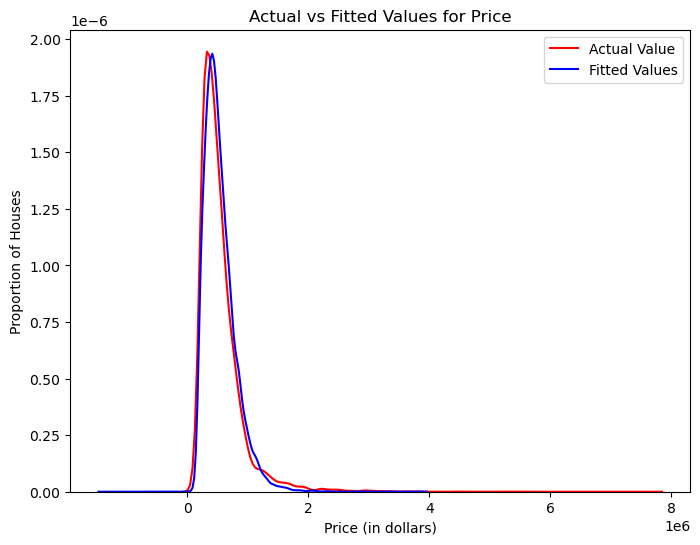

In [194]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()
plt.show()